<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/da08_gapminder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [gapminder.tsv](https://raw.githubusercontent.com/JakeOh/202505_BD50/refs/heads/main/datasets/gapminder.tsv) 파일 데이터 분석

# 필요한 모듈 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame 생성

In [2]:
file_path = 'https://raw.githubusercontent.com/JakeOh/202505_BD50/refs/heads/main/datasets/gapminder.tsv'

In [3]:
df = pd.read_csv(file_path, sep='\t')

In [4]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [7]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


# 국가 수

In [8]:
df.country.value_counts()

,count
country,
Afghanistan,12
Albania,12
Algeria,12
Angola,12
Argentina,12
...,...
Vietnam,12
West Bank and Gaza,12
"Yemen, Rep.",12


In [10]:
countries = df.country.unique()  # 국가 이름들을 저장하는 np.ndarray
len(countries)

142

In [11]:
countries.size

142

# 대륙 수

In [12]:
df.continent.value_counts()

,count
continent,
Africa,624
Asia,396
Europe,360
Americas,300
Oceania,24


In [13]:
continents = df.continent.unique()
continents.size

5

# 연도 분석

In [14]:
df.year.describe()

,year
count,1704.00000
mean,1979.50000
std,17.26533
min,1952.00000
25%,1965.75000
50%,1979.50000
75%,1993.25000
max,2007.00000


In [16]:
years = df.year.unique()
print(years)
print(years.size)

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]
12


In [18]:
df.year.value_counts()

,count
year,
1952,142
1957,142
1962,142
1967,142
1972,142
1977,142
1982,142
1987,142
1992,142


# 기대수명 분석

In [19]:
df.lifeExp.describe()

,lifeExp
count,1704.000000
mean,59.474439
std,12.917107
min,23.599000
25%,48.198000
50%,60.712500
75%,70.845500
max,82.603000


In [20]:
df.lifeExp.max()  # 기대수명 최댓값

82.603

In [21]:
df[df.lifeExp == df.lifeExp.max()]

,country,continent,year,lifeExp,pop,gdpPercap
803,Japan,Asia,2007,82.603,127467972,31656.06806


In [22]:
df[df.lifeExp == df.lifeExp.min()]  # 기대수명 최솟값

,country,continent,year,lifeExp,pop,gdpPercap
1292,Rwanda,Africa,1992,23.599,7290203,737.068595


## 일본의 연도별 기대수명

In [23]:
japan_df = df[df.country == 'Japan']
japan_df

,country,continent,year,lifeExp,pop,gdpPercap
792,Japan,Asia,1952,63.030,86459025,3216.956347
793,Japan,Asia,1957,65.500,91563009,4317.694365
794,Japan,Asia,1962,68.730,95831757,6576.649461
795,Japan,Asia,1967,71.430,100825279,9847.788607
796,Japan,Asia,1972,73.420,107188273,14778.786360
797,Japan,Asia,1977,75.380,113872473,16610.377010
798,Japan,Asia,1982,77.110,118454974,19384.105710
799,Japan,Asia,1987,78.670,122091325,22375.941890
800,Japan,Asia,1992,79.360,124329269,26824.895110
801,Japan,Asia,1997,80.690,125956499,28816.584990


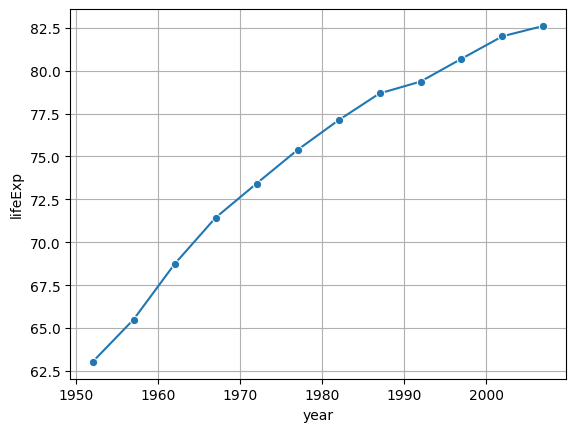

In [25]:
sns.lineplot(data=japan_df, x='year', y='lifeExp', marker='o')
plt.grid()
plt.show()

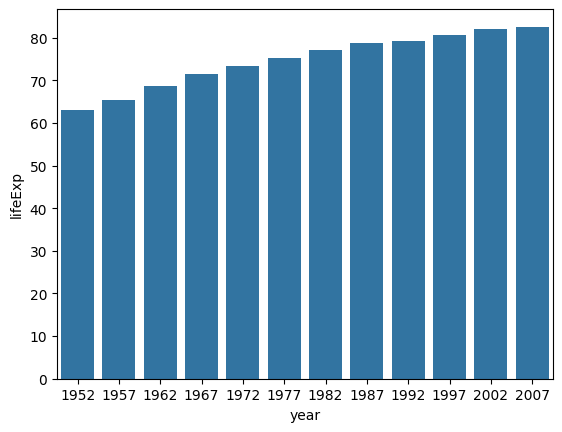

In [27]:
sns.barplot(data=japan_df, x='year', y='lifeExp', errorbar=None)
plt.show()

## 르완다의 연도별 기대수명

In [28]:
rwanda_df = df[df.country == 'Rwanda']
rwanda_df

,country,continent,year,lifeExp,pop,gdpPercap
1284,Rwanda,Africa,1952,40.000,2534927,493.323875
1285,Rwanda,Africa,1957,41.500,2822082,540.289398
1286,Rwanda,Africa,1962,43.000,3051242,597.473073
1287,Rwanda,Africa,1967,44.100,3451079,510.963714
1288,Rwanda,Africa,1972,44.600,3992121,590.580664
1289,Rwanda,Africa,1977,45.000,4657072,670.080601
1290,Rwanda,Africa,1982,46.218,5507565,881.570647
1291,Rwanda,Africa,1987,44.020,6349365,847.991217
1292,Rwanda,Africa,1992,23.599,7290203,737.068595
1293,Rwanda,Africa,1997,36.087,7212583,589.944505


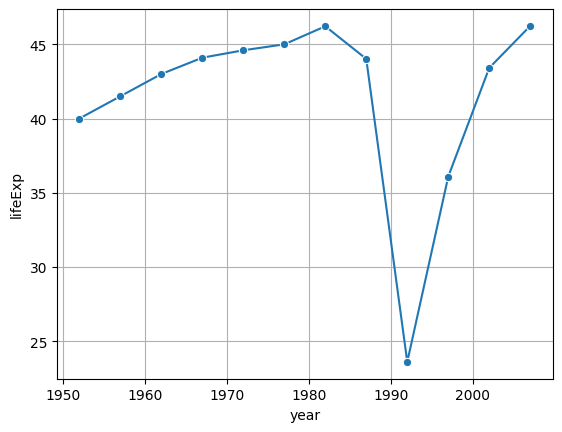

In [29]:
sns.lineplot(data=rwanda_df, x='year', y='lifeExp', marker='o')
plt.grid()
plt.show()